# Course Project No 3 - Part 2 - House prices - 2 of 2

## Import base libraries

Let's import all the base libraries that we will use in this Notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


## Load the datasets

In this Notebook, we will load the cleaned and adapted version of our two datasets. See introduction in the Notebook *house-prices-solution-1-of-2.ipynb* to know form where those files arise.


In [2]:
train_df = pd.read_csv(os.path.join('data','house-prices-cleaned.csv'))
print("Size of the train dataset:", train_df.shape)
train_df.head(3)

Size of the train dataset: (2106, 247)


,PID,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,...,3Ssn Porch Exists,Misc Val Exists,Enclosed Porch Exists,Screen Porch Exists,Continuous Sum,Total Bsmt SF**2,BsmtFin SF 1**2,BsmtFin SF 1**3,Bsmt Unf SF**2,Bsmt Unf SF**3
0,528275070,8795,3,3,7,5,10,10,4,3,...,0,0,0,0,346.0,906304.0,90000.0,27000000.0,425104.0,277167808.0
1,535305120,10170,4,3,6,6,59,59,3,3,...,0,0,0,0,597.0,46656.0,0.0,0.0,46656.0,10077696.0
2,923228250,2001,4,3,4,5,40,40,3,3,...,0,0,0,0,101.0,298116.0,0.0,0.0,298116.0,162771336.0


In [3]:
test_df = pd.read_csv(os.path.join('data','house-prices-test-cleaned.csv'))
print("Size of the test dataset:", test_df.shape)
test_df.head(3)

Size of the test dataset: (500, 247)


,PID,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,...,3Ssn Porch Exists,Misc Val Exists,Enclosed Porch Exists,Screen Porch Exists,Continuous Sum,Total Bsmt SF**2,BsmtFin SF 1**2,BsmtFin SF 1**3,Bsmt Unf SF**2,Bsmt Unf SF**3
0,909279080,11275,3,2,6,7,78,60,3,3,...,0,0,1,0,548.0,729316.0,88209.0,26198073.0,0.0,0.000000e+00
1,907126050,9757,4,2,5,7,16,16,3,4,...,0,0,0,1,131.0,980100.0,570025.0,430368875.0,55225.0,1.297788e+07
2,528144030,11065,3,3,8,5,4,4,4,3,...,0,0,0,0,1125.0,1177225.0,0.0,0.0,1177225.0,1.277289e+09


Ok, so here we are, cleaned Train and adapted Test datasets ready for machine learning work.

## Model Fitting

In order to fit different models and evaluate them, we have to obtain a test set with known 'SalePrice' values.

As the Test dataset we have does not include this information (we are seeking for a good model to predict 'SalePrive of the Test dataset), we are forced to build a new train/test dataset from the main TRain dataset. The main Test dataset will be used at the very last of this Notebook when we will try to predict their 'SalePrice'

So, first thing to do, build an train/test dataset based on 80%/20% randomly selected rows from the main Train dataset

### Create feature matrix and vector result

We have to fit three models: a simple, an intermediate and a complex one.

Difference between those models are the number of feature we consider to fit the model.

    * Simple model: Use 3 features from dataset
    * Intermediate model: Use 15 features from dataset
    * Complex model: Use all features
    
I've decided to use the *SelectKBest* to build the simple and intermediate feature matrix.

> Note: Variables and results for the three different models will be stored into a dict() named *model_results*


In [4]:
SMALL_NB_FEATURE=3
MEDIUM_NB_FEATURE=15

model_results = {
    'small': {
        'name': 'simple model',
        'filename': 'predictions-simple-model.csv',
    },
    'medium': {
        'name': 'intermediate model',
        'filename': 'predictions-intermediate-model.csv',
    },
    'full': {
        'name': 'complex model',
        'filename': 'predictions-complex-model.csv',
    },
}

#### Build datasets, feature matrix and result vector for the complex model

In [5]:
from sklearn.model_selection import train_test_split

# Constant used to split main Train dataset in two train/test datasets
TRAIN_SIZE=0.8
RANDOM_STATE=0


# Function used to build feature matrix and result vector
def buildDataMatrix(model_results, model_name, df=train_df):
    """
    This function is used to build feature matrix and result vector.
    It expect as first parameter the global dict variable to store the result.
    Second parameter is the name of the model, and the third is the dataframe to
    use (default is train_df).
    """
    # Split data in two dataframe: complex model
    # Based on the full featured train_df dataset
    tr_df, te_df = train_test_split(df, test_size = 1-TRAIN_SIZE, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
    # Build feature matrix X and result vector y narray from the train and test dataframe
    model_results[model_name]['X_tr'] = tr_df.drop(['SalePrice','PID'], axis=1, errors='ignore').values
    model_results[model_name]['y_tr'] = tr_df.SalePrice.values
    model_results[model_name]['X_te'] = te_df.drop(['SalePrice','PID'], axis=1, errors='ignore').values
    model_results[model_name]['y_te'] = te_df['SalePrice'].values

    model_results[model_name]['X'] = np.concatenate((model_results[model_name]['X_tr'], model_results[model_name]['X_te']))
    model_results[model_name]['y'] = np.concatenate((model_results[model_name]['y_tr'], model_results[model_name]['y_te']))
    
    model_results[model_name]['features'] = tr_df.drop(['SalePrice','PID'], axis=1, errors='ignore').columns
    model_results[model_name]['result']   = 'SalePrice'

    
    print("Model:", model_name)
    print("  Shape of X_tr variable:".format(model_name), model_results[model_name]['X_tr'].shape)
    print("  Shape of y_tr variable:",model_results[model_name]['y_tr'].shape)

    print("  Shape of X_te variable:",model_results[model_name]['X_te'].shape)
    print("  Shape of y_te variable:",model_results[model_name]['y_te'].shape)

    print("  Shape of X variable   :",model_results[model_name]['X'].shape)
    print("  Shape of y variable   :",model_results[model_name]['y'].shape)
    
buildDataMatrix(model_results, 'full')


Model: full
  Shape of X_tr variable: (1684, 245)
  Shape of y_tr variable: (1684,)
  Shape of X_te variable: (422, 245)
  Shape of y_te variable: (422,)
  Shape of X variable   : (2106, 245)
  Shape of y variable   : (2106,)


#### Use SelectKBest to build the small and medium datasets

I use a trick to retrieve the dataset column name selected by the *SelectKBest* model.

    > [https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le]

In [6]:
# Import libraries for SlectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Build data for the two models
for model_name, nb_feature in zip(['small', 'medium'],[SMALL_NB_FEATURE, MEDIUM_NB_FEATURE]):
    
    print("Build model '{}' with {} selected using SelectKBest".format(model_name,nb_feature))
    
    # Create SelectKBest instance using 'chi2' score function
    select = SelectKBest(mutual_info_regression, k=nb_feature)
    
    # fit the model with models['complex'] (full feature)
    select.fit(model_results['full']['X'], model_results['full']['y'])
    
    # Get a mask of the feature selected
    mask = select.get_support() #list of booleans
    
    # Retrieve feature names
    features = []
    for bool, feature in zip(mask, model_results['full']['features']):
        if bool:
            features.append(feature)

    print("  Feature selected:", features)
    features.append('SalePrice')

    
    
    buildDataMatrix(model_results, model_name, df=train_df[features])
    
    


Build model 'small' with 3 selected using SelectKBest
  Feature selected: ['Overall Qual', 'Year Built', 'Gr Liv Area']
Model: small
  Shape of X_tr variable: (1684, 3)
  Shape of y_tr variable: (1684,)
  Shape of X_te variable: (422, 3)
  Shape of y_te variable: (422,)
  Shape of X variable   : (2106, 3)
  Shape of y variable   : (2106,)
Build model 'medium' with 15 selected using SelectKBest
  Feature selected: ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Continuous Sum', 'Total Bsmt SF**2']
Model: medium
  Shape of X_tr variable: (1684, 15)
  Shape of y_tr variable: (1684,)
  Shape of X_te variable: (422, 15)
  Shape of y_te variable: (422,)
  Shape of X variable   : (2106, 15)
  Shape of y variable   : (2106,)


### Import needed libraries and create Pipelines instances

I've decided to test Ridge and Huber regressor on the three models.


In [7]:
# Import lib
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE


In [8]:
pipelines = {
    'dummy': Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', DummyClassifier())
        ]),
    'huber': Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', HuberRegressor())
        ]),
    'ridge': Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', Ridge())
        ]),
}


### Fit pipeline models to the three datasets

The following function uses the pippelines to fit models on our three dataset.

At the end ot the work, it adds a baseline estimator which uses the mean values of the test result vector as result prediction.

In [9]:

# Fit estimator with our defined pipelines

def fitModels(model_results=model_results, pipelines=pipelines):
    smallest_mae = None
    best_model = None
    for model_name in model_results.keys():
        model_results[model_name]['regression'] = {}
        for pipeline_name in pipelines.keys():
            # fit model Ridge with outliers
            pipelines[pipeline_name].fit(model_results[model_name]['X_tr'], model_results[model_name]['y_tr'])

            # predict values
            y_pred=10**pipelines[pipeline_name].predict(model_results[model_name]['X_te'])
    
            # Get MAE
            mae=MAE(10**model_results[model_name]['y_te'], y_pred)
            
            # Store best model information
            if (smallest_mae == None) or (smallest_mae > mae):
                smallest_mae=mae
                best_model=(model_name, pipeline_name)
    
            # store value in global dict
            model_results[model_name]['regression'][pipeline_name] = {
                'y_pred': y_pred,
                'mae': mae,
            }

            print("MAE with {} regressor and outliers on {} model: {:.0f} $".format(pipeline_name, model_name, mae))
            
    print("\n => Best model is {} on {} dataset".format(best_model[1], best_model[0]))
    
    y_pred_mean=np.full(model_results['full']['y_te'].shape[0], model_results['full']['y_te'].mean())

    return

            
fitModels()


MAE with dummy regressor and outliers on small model: 69225 $
MAE with huber regressor and outliers on small model: 19783 $
MAE with ridge regressor and outliers on small model: 19739 $
MAE with dummy regressor and outliers on medium model: 67359 $
MAE with huber regressor and outliers on medium model: 15839 $
MAE with ridge regressor and outliers on medium model: 16023 $
MAE with dummy regressor and outliers on full model: 64659 $


/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-p

MAE with huber regressor and outliers on full model: 12572 $
MAE with ridge regressor and outliers on full model: 13321 $

 => Best model is huber on full dataset


## Regularization

Right. We've found that the best results are obtained using HuberRegressor on the full dataset using default parameters.

Let's now try to find the optimum parameters to improve our model. We will do this in two manner. First approach, the simplest one, we will try different values of the *alpha* hpyperparameter and seek for the best MAE result. Second approach, we will use the *GridSearchCV* class from sklearn.

The simple approach will be used to tune hyperparameters of the Ridge estimator, as we will vary *alpha* only.

The *GridSearchCV* will be used to tune Huber estimator as we will play with *epsilon* and *alpha* parameter.

> Note: Regularization will be done on the full dataset as it is with it that we obtain the best results so far


### Try a range of *alpha* values

Build a *gs_result* list that will contain, for a range of *alpha*, the mean average value of the train and test dataset.

In [10]:

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-10, 10, num=100):
    model='ridge'
    # Fit estimator
    pipelines[model].set_params(**{'estimator__alpha': alpha})
    pipelines[model].fit(model_results['full']['X_tr'], model_results['full']['y_tr'])
    
    # Save model and its performance on train/test sets
    gs_results.append({
        'alpha': alpha,
        'train_mae': MAE(10**model_results['full']['y_tr'], 10**pipelines[model].predict(model_results['full']['X_tr'])),
        'test_mae': MAE(10**model_results['full']['y_te'], 10**pipelines[model].predict(model_results['full']['X_te'])),
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()



,alpha,test_mae,train_mae
0,1.000000e-10,13357.155478,10277.51941
1,1.592283e-10,13357.100601,10277.51941
2,2.535364e-10,13356.614920,10277.51941
3,4.037017e-10,13356.635559,10277.51941
4,6.428073e-10,13356.500762,10277.51941


Using the results found above, search for the best MAE and plot the MAE found for the train and test dataset

Best alpha for Ridge: 20.56512
Train MAE: 10,314$
Test MAE: 13,226$


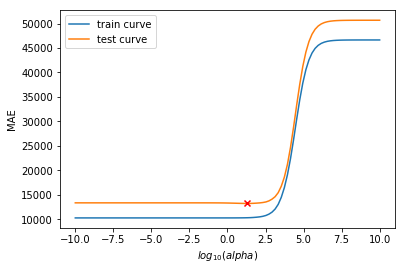

In [11]:
# Get entry with the best test MAE
best_result = gs_results.loc[gs_results.test_mae.idxmin()]

# Print the details
print('Best alpha for Ridge: {:.5f}'.format(best_result.alpha))
print('Train MAE: {:,.0f}$'.format(best_result.train_mae))
print('Test MAE: {:,.0f}$'.format(best_result.test_mae))

# Plot the validation curves
plt.plot(np.log10(gs_results['alpha']), gs_results['train_mae'], label='train curve')
plt.plot(np.log10(gs_results['alpha']), gs_results['test_mae'], label='test curve')

plt.scatter(np.log10(best_result.alpha), best_result.test_mae, marker='x', c='red', zorder=10)

plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

Add a new Ridge regressor to our pipelines list.

In [12]:
pipelines['ridgeX'] = Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', Ridge(alpha=best_result.alpha))
])
print(pipelines['ridgeX'])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', Ridge(alpha=20.565123083486515, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])


### Use GridSearchCV to test a bunch of parameters

Epsilon value is one of the parameters of the HuberRegressor. Should we found best results if we try different values for the others parameters: max_iter, alpha and tol.

Instead of writing nested *for loops* to try different combinations, let's use the GreadSearchCV class. This class simply tries all the combination of parameters we'd like to test and calculate for each combination the score it makes.

> Note: GreadSearchCV use a KFold approach to select the train and test data from the main dataset. Let's then use the train_df full dataset to feed our GridSearcCV onbject. More on KFlod here: https://machinelearningmastery.com/k-fold-cross-validation/

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

model='huber'
params = {
    'estimator__epsilon': np.linspace(1, 2, num=10),
    'estimator__alpha': np.logspace(1, 3, num=20)
}

# Define r2_score() as scorer parameter
score=make_scorer(r2_score)



gridsearch=GridSearchCV(pipelines[model], params, scoring=score, return_train_score=False, cv=5)
gridsearch.fit(model_results['full']['X'], model_results['full']['y'])

grid_df=pd.DataFrame(gridsearch.cv_results_)[['param_estimator__alpha','param_estimator__epsilon', 'mean_test_score','rank_test_score']]
print(gridsearch.best_params_)
grid_df.sort_values('mean_test_score', ascending=False).head(3)

{'estimator__alpha': 615.8482110660261, 'estimator__epsilon': 1.2222222222222223}


,param_estimator__alpha,param_estimator__epsilon,mean_test_score,rank_test_score
172,615.848,1.22222,0.897805,1
182,784.76,1.22222,0.897782,2
162,483.293,1.22222,0.897772,3


In [14]:
gridsearch.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', HuberRegressor(alpha=615.8482110660261, epsilon=1.2222222222222223,
        fit_intercept=True, max_iter=100, tol=1e-05, warm_start=False))])

In [18]:
pipelines['huberX']=gridsearch.best_estimator_
print(pipelines['huberX'])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', HuberRegressor(alpha=615.8482110660261, epsilon=1.2222222222222223,
        fit_intercept=True, max_iter=100, tol=1e-05, warm_start=False))])


In [19]:
fitModels()

/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-p

MAE with dummy regressor and outliers on small model: 70107 $
MAE with huber regressor and outliers on small model: 19783 $
MAE with ridge regressor and outliers on small model: 50668 $
MAE with ridgeX regressor and outliers on small model: 19735 $
MAE with huberX regressor and outliers on small model: 19883 $
MAE with dummy regressor and outliers on medium model: 68324 $
MAE with huber regressor and outliers on medium model: 15839 $
MAE with ridge regressor and outliers on medium model: 50668 $
MAE with ridgeX regressor and outliers on medium model: 16049 $
MAE with huberX regressor and outliers on medium model: 15948 $
MAE with dummy regressor and outliers on full model: 69312 $
MAE with huber regressor and outliers on full model: 12572 $
MAE with ridge regressor and outliers on full model: 50668 $
MAE with ridgeX regressor and outliers on full model: 13226 $
MAE with huberX regressor and outliers on full model: 12606 $

 => Best model is huber on full dataset


## Communicating the results

MAE results of our different models:
	small set - dummy reg.              : 68420.56   
	small set - huber reg.              : 19783.38   
	small set - ridge reg.              : 50668.18   
	small set - ridgeX reg.             : 19734.52   
	small set - huberX reg.             : 19882.61   
	medium set - dummy reg.             : 70820.68   
	medium set - huber reg.             : 15839.05   
	medium set - ridge reg.             : 50668.14   
	medium set - ridgeX reg.            : 16049.16   
	medium set - huberX reg.            : 15948.22   
	full set - dummy reg.               : 67417.04   
	full set - huber reg.               : 12571.74   (smallest value)
	full set - ridge reg.               : 50668.08   
	full set - ridgeX reg.              : 13225.85   
	full set - huberX reg.              : 12605.68   


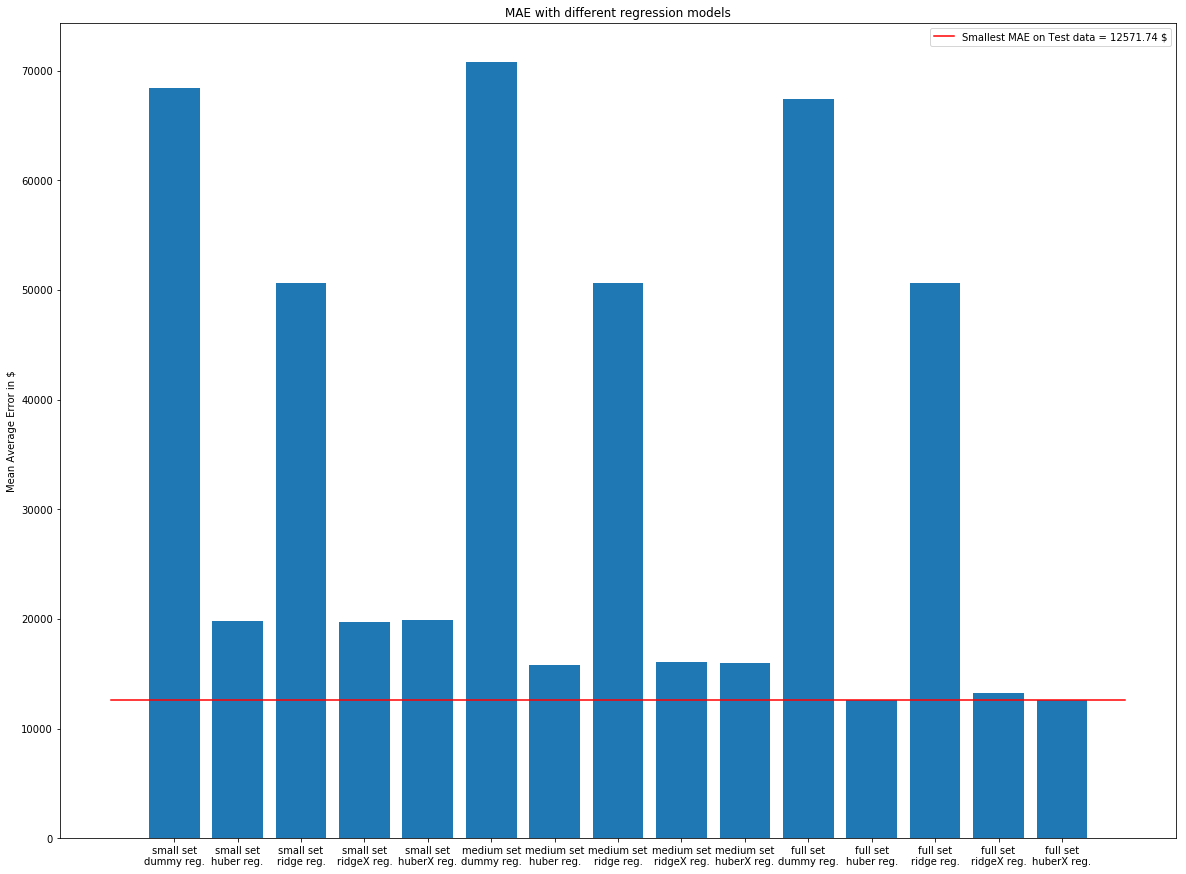

In [16]:
FIGURE_SIZE=(20,15)

mae_values = []
mae_labels=[]

print("MAE results of our different models:")
for model_name in model_results.keys():
    for pipeline_name in model_results[model_name]['regression'].keys():
        mae_labels.append("{} set\n{} reg.".format(model_name, pipeline_name))
        mae_values.append(model_results[model_name]['regression'][pipeline_name]['mae'])

for (label, value) in zip(mae_labels, mae_values):
    if value == np.min(mae_values):
        smallest = "(smallest value)"
    else:
        smallest = ""
    print("\t{:35} : {:.2f}   {}".format(label.replace("\n"," - "), value, smallest))

# Bar chart to compare our model
plt.figure(figsize=FIGURE_SIZE)
plt.bar([i for i in range(1,len(mae_values)+1)], mae_values)
plt.xticks([i for i in range(1,len(mae_values)+1)], mae_labels)
plt.title('MAE with different regression models')
plt.ylabel("Mean Average Error in $")

mae_min = np.min(mae_values)
plt.plot([0,len(mae_values)+1],[mae_min, mae_min], c='red', label="Smallest MAE on Test data = {:.2f} $".format(mae_min))

plt.legend()
plt.show()



Note that *huber* and *huberX* are really similar and *huber* is slightly better than *huberX*.

That could be surprising as *huberX* is the result of a grid search of *huber* hyperparameter. The difference comes from the scorer function we've used to evaluate both model. *huber* is evaluated with mean_absolute_error() function, and *huberX* is evaluated using 'r2_score'.

## Compute predictions

In [17]:

# Model choosen to compute prediction.
model='huberX'

for model_name in model_results.keys():
    print("Working with {} ({} dataset)".format(model_results[model_name]['name'], model_name))

    
    # Fit model
    print("Fit model")
    pipelines[model].fit(model_results[model_name]['X_tr'], model_results[model_name]['y_tr'])

    # Build test feature matrix
    X=test_df[model_results[model_name]['features']]

    # Predict result
    print("Predict values")
    y_pred=np.round(10**pipelines[model].predict(X))
    
    # Replace 'SalePrice' column values
    test_df['SalePrice']=y_pred
    
    # Save file
    filename=model_results[model_name]['filename']
    print("Save result to", filename)
    test_df[['PID','SalePrice']].to_csv(os.path.join('data',filename), index=False)





Working with simple model (small dataset)
Fit model
Predict values
Save result to predictions-simple-model.csv
Working with intermediate model (medium dataset)
Fit model
Predict values
Save result to predictions-intermediate-model.csv
Working with complex model (full dataset)
Fit model
Predict values
Save result to predictions-complex-model.csv


/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/xavier/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/pipelin

## Evaluate your predictions

Here we are, here are the results:


### First try

HuberRegressor: Epsilon=1.22 	Alpha=Default

| | Simple model | Intermediate model | Complex model |
| :------------- | :----------: | -----------: | -----------: |
| MAE (\$) | \$ 23,719.41 | \$ 18,821.62 | \$ 15,029.44 |
| RMSE | 52335.95 | 43417.84 | 41902.92 |


### Second try

HuberRegressor: Epsilon=1.2625 	Alpha=100

| | Simple model | Intermediate model | Complex model |
| :------------- | :----------: | -----------: | -----------: |
| MAE (\$) | \$ 23,697.06 | \$ 18,814.43 | \$ 14,997.10 |
| RMSE | 52193.81 | 43241.75 | 41439.97 |


### Third try

Remove outliers

HuberRegressor: Epsilon=1.2625 	Alpha=100

| | Simple model | Intermediate model | Complex model |
| :------------- | :----------: | -----------: | -----------: |
| MAE (\$) | \$ 23,817.48 | \$ 19,209.57 | \$ 15,532.53 |
| RMSE | 41358.67 | 45165.21 | 44430.35 |
                      

### Fourth try

Remove outliers

Polynomial increase on some columns

HuberRegressor: Epsilon=1.2222 	Alpha=615.48

| | Simple model | Intermediate model | Complex model |
| :------------- | :----------: | -----------: | -----------: |
| MAE (\$) | \$ 23,961.11 | \$ 18,920.50 | \$ 15,382.27 |
| RMSE | 41170.86 | 40849.28 | 43633.09 |
                      

### Fifth try

Remove outliers

Polynomial increase on some columns

RidgeRegressor: Alpha=20.56512

| | Simple model | Intermediate model | Complex model |
| :------------- | :----------: | -----------: | -----------: |
| MAE (\$) | \$ 23,518.78 | \$ 19,086.00 | \$ 16,161.12 |
| RMSE | 42357.58 | 39879.76 | 46693.70 |
                      